In [49]:
from astropy.io import fits
# from backports import configparser
import matplotlib.pyplot as plt
import os,sys
import glob
import shutil
import pandas as pd
import subprocess
import argparse
import math
import re
from astropy.table import Table, vstack
from astropy.io import ascii
import numpy as np

In [50]:
cur_dir='/Users/liuzhaoran/Desktop/miri/galfit/'
os.chdir(cur_dir)


In [51]:
data_original = Table.read('pah_0302newpsfgoodsed_re_allmiriband_hotmode.csv')
#index_data_original = np.where(data_original['idalp']>933)[0]
#data_original = data_original[index_data_original]

In [52]:
#sex_file=sorted(glob.glob('/Users/liuzhaoran/Desktop/miri/radial_profile/*.fits'))

#sci_im=sorted(glob.glob('/Users/liuzhaoran/Desktop/miri/radial_profile/*770psf_200_100_100.fits'))

#sig_im =sorted(glob.glob('/Users/liuzhaoran/Desktop/miri/radial_profile/*200_100_100_rms.fits'))

sci_im=sorted(glob.glob('/Users/liuzhaoran/Desktop/miri/make_cut_out_for_highz/cutout_41784209/*200_60_60.fits'))

sig_im =sorted(glob.glob('/Users/liuzhaoran/Desktop/miri/make_cut_out_for_highz/cutout_41784209/*200_60_60_rms.fits'))

#psf_im = glob.glob('/Users/liuzhaoran/Desktop/miri/galfit/psf_F200W_150.fits')
len(sci_im), len(data_original)

(2, 27)

In [63]:

cur_dir='/Users/liuzhaoran/Desktop/miri/galfit/'
os.chdir(cur_dir)
q = data_original['b_image_JWST_NIRCAM_MULTIPLE_F200W']/data_original['a_image_JWST_NIRCAM_MULTIPLE_F200W']
pa = data_original['theta_JWST_NIRCAM_MULTIPLE_F200W']

from tqdm.notebook import tqdm as tqdm
#for i in tqdm(range(len(sci_im))):
for i in tqdm(range(1)):
    i = 20
#for i in tqdm(range(8)):
#    sex_f=sci_im[i][:8]
    sex_f = data_original['idalp'][i]
    sex_fn=sci_im[0]
   # psf_fn = psf_im
    sig_f = sig_im[0]
    #sex_f=int(sex_f)
    print(sex_f)
    #target_gal=target_object(sex_f)
    gal_feed= pd.read_csv('./inpgalfit_200.inp',sep='delimiter', header=None, engine='python')
    #gal_feed[0][2] ='A) '+sex_f+'_sci.fits        # Input data image (FITS file)'
    gal_feed[0][2] ='A) '+sex_fn+'        # Input data image (FITS file)'
    gal_feed[0][3] ='B) '+str(sex_f)+'_out_200.fits        # Output data image block'
    gal_feed[0][4] ='C)  '+sig_f+  '    Sigma image name (made from data if blank or none)'

    

    #gal_feed[0][5] ='D) '+str(sex_f)+'_psf.fits         # Input PSF image and (optional) diffusion kernel'
    #gal_feed[0][5] ='D)   '+psf_F200W_150.fits+'      # Input PSF image and (optional) diffusion kernel'
    #gal_feed[0][7] ='F) '+str(sex_f)+'_mask.fits        #Bad pixel mask (FITS image or ASCII coord list)'
    gal_feed[0][7] ='F) none        #Bad pixel mask (FITS image or ASCII coord list)'
    
    
    #######################
    gal_feed[0][31] ='1)  30 30 1 1       #  Position x, y'
    gal_feed[0][32] ='3)  22.01 1       #  Integrated magnitude' 
    gal_feed[0][33] ='4) 5 1       #  R_e (effective radius)   [pix] '
    
    gal_feed[0][35] ='4) 2 1       #  Sersic index n (de Vaucouleurs n=4)  '
    
    #b_a=target_gal['B_IMAGE'][0]/target_gal['A_IMAGE'][0]
    #if(b_a>0.75):
    gal_feed[0][38] ='9) '+str(q[i])+' 1       #  Axis ratio (b/a)'
    #elif(b_a<0.2):
    #    gal_feed[0][38] ='9) 0.5 1       #  Axis ratio (b/a)'
    #else:
      #  gal_feed[0][38] ='9) '+ str((target_gal['B_IMAGE'][0]/target_gal['A_IMAGE'][0]))+ ' 1       #  Axis ratio (b/a)'
 
    gal_feed[0][39] ='10) '+str(pa[i])+' 1       #  Position angle (PA) [deg: Up=0, Left=90]'


    #gal_feed[0][43] ='1) 1.39       #  sky background at center of fitting region [ADUs]'
    
    
    gal_feed.to_csv(str(sex_f)+'.feed', sep='\t', encoding='utf-8',index=False,header=False)
    cmd='./galfit ' +str(sex_f)+'.feed'

    #
    !{cmd}



  0%|          | 0/1 [00:00<?, ?it/s]

4178

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: 4178.feed


# IMAGE and GALFIT CONTROL PARAMETERS
A) /Users/liuzhaoran/Desktop/miri/make_cut_out_for_highz/cutout_41784209/4178_200_60_60.fits      # Input data image (FITS file)
B) 4178_out_200.fits      # Output data image block
C) /Users/liuzhaoran/Desktop/miri/make_cut_out_for_highz/cutout_41784209/4178_200_60_60_rms.fits      # Sigma image name (made from data if blank or "none") 
D) psf200_770_100_100.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) none                # Bad pixel mask (FITS image or ASCII coord list)
G) none                # File with parameter constraints (ASCII file) 
H) 1    60   1    60   # Image region to fit (xmin xmax ymin ymax)
I) 60     60           # Size of the convolution box (x y)
J) 28.000              # Magnitude photometric zeropoint 
K) 0.031  0.031        # Plate scale (dx dy)   [arcsec per pi


Iteration : 21    Chi2nu: 9.932e+01     dChi2/Chi2: -3.28e-08   alamda: 1e-01     
 sersic    : (   34.08,    27.55)   23.87      5.34    1.52    0.72   -89.00
 sky       : [ 30.50,  30.50]  7.73e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 22    Chi2nu: 9.932e+01     dChi2/Chi2: -3.28e-08   alamda: 1e+00     
 sersic    : (   34.08,    27.55)   23.87      5.34    1.52    0.72   -89.00
 sky       : [ 30.50,  30.50]  7.73e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 23    Chi2nu: 9.906e+01     dChi2/Chi2: -2.69e-03   alamda: 1e-01     
 sersic    : (   34.32,    27.36)   23.86      5.10    1.06    0.99     6.39
 sky       : [ 30.50,  30.50]  7.66e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 77 

Iteration : 24    Chi2nu: 9.906e+01     dChi2/Chi2: 2.83e-08    alamda: 1e+00     
 sersic    : (   34.32,    27.36)   23.86      5.10    1.06    0.99     6.39
 sky       : [ 30.50,  30.50]  7.66e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 25    Chi2nu: 9.906e+01 


Iteration : 56    Chi2nu: 6.577e+01     dChi2/Chi2: -5.87e-02   alamda: 1e+00     
 sersic    : (   47.50,    14.91)   22.15     24.42    0.91    0.15    42.54
 sky       : [ 30.50,  30.50]  5.11e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 44 

Iteration : 57    Chi2nu: 6.577e+01     dChi2/Chi2: 1.19e-08    alamda: 1e+01     
 sersic    : (   47.50,    14.91)   22.15     24.42    0.91    0.15    42.54
 sky       : [ 30.50,  30.50]  5.11e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 58    Chi2nu: 6.253e+01     dChi2/Chi2: -5.20e-02   alamda: 1e+00     
 sersic    : (   47.66,    14.70)   22.13     24.20    0.60    0.15    42.92
 sky       : [ 30.50,  30.50]  5.05e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 42 

Iteration : 59    Chi2nu: 6.253e+01     dChi2/Chi2: -2.32e-08   alamda: 1e+01     
 sersic    : (   47.66,    14.70)   22.13     24.20    0.60    0.15    42.92
 sky       : [ 30.50,  30.50]  5.05e-02  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 60    Chi2nu: 6.012e+01


Iteration : 91    Chi2nu: 6.103e+00     dChi2/Chi2: -3.21e-03   alamda: 1e-03     
 sersic    : (  *64.20*,  *-3.46*)  18.99    141.93  *18.96*   0.39    49.36
 sky       : [ 30.50,  30.50]  -2.69e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 92    Chi2nu: 6.103e+00     dChi2/Chi2: -4.13e-08   alamda: 1e-02     
 sersic    : (  *64.20*,  *-3.46*)  18.99    141.93  *18.96*   0.39    49.36
 sky       : [ 30.50,  30.50]  -2.69e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 93    Chi2nu: 6.094e+00     dChi2/Chi2: -1.58e-03   alamda: 1e-03     
 sersic    : (  *64.20*,  *-3.43*)  18.95    164.09  *19.57*   0.39    49.40
 sky       : [ 30.50,  30.50]  -3.12e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 94    Chi2nu: 6.094e+00     dChi2/Chi2: 1.07e-08    alamda: 1e-02     
 sersic    : (  *64.20*,  *-3.43*)  18.95    164.09  *19.57*   0.39    49.40
 sky       : [ 30.50,  30.50]  -3.12e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 95    Chi2nu: 6.094e+

In [64]:

out_file=sorted(glob.glob('*_out_200.fits'))


output_dir='./output/out_image/'
shutil.rmtree(output_dir, ignore_errors=True)
os.mkdir(output_dir)
srcdir = './output/out_image/'

for outfile in out_file:
    shutil.move(outfile,srcdir)
#shutil.move(fits_dir+'/'+filter_list[1][:3]+".cat",srcdir)
        #shutil.move(fits_dir+fitsfile[:-5]+".coo",srcdir)
#shutil.move(fits_dir+'/'+fitsfile[:-5]+".reg",srcdir)

#shutil.move(fits_dir+'/'+fitsfile[:-5]+".txt",srcdir)
output_dir='./output/log/'
shutil.rmtree(output_dir, ignore_errors=True)
os.mkdir(output_dir)
srcdir = './output/log/'
out_feed=glob.glob('2*.feed')
for outfile in out_feed:
    shutil.move(outfile,srcdir)

out_feed=glob.glob('galfit.*')
for outfile in out_feed:
    shutil.move(outfile,srcdir)

out_feed=glob.glob('*.log')
for outfile in out_feed:
    shutil.move(outfile,srcdir)


In [65]:
%pylab inline
from __future__ import division 

import copy
import numpy as np

# Matplotlib default settings
rcdef = plt.rcParams.copy()
pylab.rcParams['figure.figsize'] = 12, 10
pylab.rcParams['xtick.major.size'] = 8.0
pylab.rcParams['xtick.major.width'] = 1.5
pylab.rcParams['xtick.minor.size'] = 4.0
pylab.rcParams['xtick.minor.width'] = 1.5
pylab.rcParams['ytick.major.size'] = 8.0
pylab.rcParams['ytick.major.width'] = 1.5
pylab.rcParams['ytick.minor.size'] = 4.0

pylab.rcParams['ytick.minor.width'] = 1.5
rc('axes', linewidth=2)

from astropy.io import fits 
from astropy import units as u
from astropy.stats import sigma_clip




import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord

import os
import glob


def getConvKernel(kernel):
    """
    Convolution kernel for the SEP detections
    """
    if kernel == 1:
        # Tophat_3.0_3x3
        convKer = np.asarray([[0.560000, 0.980000, 0.560000],
                              [0.980000, 1.000000, 0.980000],
                              [0.560000, 0.980000, 0.560000]])
    elif kernel == 2:
        # Topcat_4.0_5x5
        convKer = np.asarray([[0.000000, 0.220000, 0.480000, 0.220000, 0.000000],
                             [0.220000, 0.990000, 1.000000, 0.990000, 0.220000],
                             [0.480000, 1.000000, 1.000000, 1.000000, 0.480000],
                             [0.220000, 0.990000, 1.000000, 0.990000, 0.220000],
                             [0.000000, 0.220000, 0.480000, 0.220000, 0.000000]])
    elif kernel == 3:
        # Topcat_5.0_5x5
        convKer = np.asarray([[0.150000, 0.770000, 1.000000, 0.770000, 0.150000],
                             [0.770000, 1.000000, 1.000000, 1.000000, 0.770000],
                             [1.000000, 1.000000, 1.000000, 1.000000, 1.000000],
                             [0.770000, 1.000000, 1.000000, 1.000000, 0.770000],
                             [0.150000, 0.770000, 1.000000, 0.770000, 0.150000]])
    elif kernel == 4:
        # Gaussian_3.0_5x5
        convKer = np.asarray([[0.092163, 0.221178, 0.296069, 0.221178, 0.092163],
                             [0.221178, 0.530797, 0.710525, 0.530797, 0.221178],
                             [0.296069, 0.710525, 0.951108, 0.710525, 0.296069],
                             [0.221178, 0.530797, 0.710525, 0.530797, 0.221178],
                             [0.092163, 0.221178, 0.296069, 0.221178, 0.092163]])
    elif kernel == 5:
        # Gaussian_4.0_7x7
        convKer = np.asarray([[0.047454, 0.109799, 0.181612, 0.214776, 0.181612, 0.109799, 0.047454],
                             [0.109799, 0.254053, 0.420215, 0.496950, 0.420215, 0.254053, 0.109799],
                             [0.181612, 0.420215, 0.695055, 0.821978, 0.695055, 0.420215, 0.181612],
                             [0.214776, 0.496950, 0.821978, 0.972079, 0.821978, 0.496950, 0.214776],
                             [0.181612, 0.420215, 0.695055, 0.821978, 0.695055, 0.420215, 0.181612],
                             [0.109799, 0.254053, 0.420215, 0.496950, 0.420215, 0.254053, 0.109799],
                             [0.047454, 0.109799, 0.181612, 0.214776, 0.181612, 0.109799, 0.047454]])
    elif kernel == 6:
        # Gaussian_5.0_9x9
        convKer = np.asarray([[0.030531, 0.065238, 0.112208, 0.155356, 0.173152, 0.155356, 0.112208, 0.065238, 0.030531],
                             [0.065238, 0.139399, 0.239763, 0.331961, 0.369987, 0.331961, 0.239763, 0.139399, 0.065238],
                             [0.112208, 0.239763, 0.412386, 0.570963, 0.636368, 0.570963, 0.412386, 0.239763, 0.112208],
                             [0.155356, 0.331961, 0.570963, 0.790520, 0.881075, 0.790520, 0.570963, 0.331961, 0.155356],
                             [0.173152, 0.369987, 0.636368, 0.881075, 0.982004, 0.881075, 0.636368, 0.369987, 0.173152],
                             [0.155356, 0.331961, 0.570963, 0.790520, 0.881075, 0.790520, 0.570963, 0.331961, 0.155356],
                             [0.112208, 0.239763, 0.412386, 0.570963, 0.636368, 0.570963, 0.412386, 0.239763, 0.112208],
                             [0.065238, 0.139399, 0.239763, 0.331961, 0.369987, 0.331961, 0.239763, 0.139399, 0.065238],
                             [0.030531, 0.065238, 0.112208, 0.155356, 0.173152, 0.155356, 0.112208, 0.065238, 0.030531]])
    else:
        raise Exception("### More options will be available in the future")

    return convKer
        





%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/liuzhaoran/miniforge3/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['mod', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [66]:
def zscale(img, contrast=0.25, samples=500):

    # Image scaling function form http://hsca.ipmu.jp/hscsphinx/scripts/psfMosaic.html
    ravel = img.ravel()
    if len(ravel) > samples:
        imsort = np.sort(np.random.choice(ravel, size=samples))
    else:
        imsort = np.sort(ravel)

    n = len(imsort)
    #print(n)
    idx = np.arange(n)

    med = imsort[250]
    w = 0.25
    i_lo, i_hi = int((0.5-w)*n), int((0.5+w)*n)
    nan_array=np.isnan(imsort[i_lo:i_hi])
    non_nan_array=~nan_array
    new_imsort=imsort[i_lo:i_hi][non_nan_array]
    p = np.polyfit(idx[i_lo:i_hi][non_nan_array], new_imsort, 1)
    slope, intercept = p

    z1 = med - (slope/contrast)*(n/2-n*w)
    z2 = med + (slope/contrast)*(n/2-n*w)

    return z1, z2

def plot_img(ax,img):
    #fig = plt.figure(figsize=(10, 10))
    #fig.subplots_adjust(hspace=0.1, wspace=0.1,
                    #top=0.95, right=0.95)
    #ax = gca()
    fontsize = 14
    ax.minorticks_on()

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    #ax.set_title(str(filename[:17]), fontsize=25, fontweight='bold')
    ax.title.set_position((0.5,1.01))
    imin, imax = zscale(img, contrast=0.10, samples=500)
   
    ax.imshow(np.arcsinh(img), interpolation="none", 
           vmin=imin, vmax=imax,)
#plt.gca().invert_xaxis()



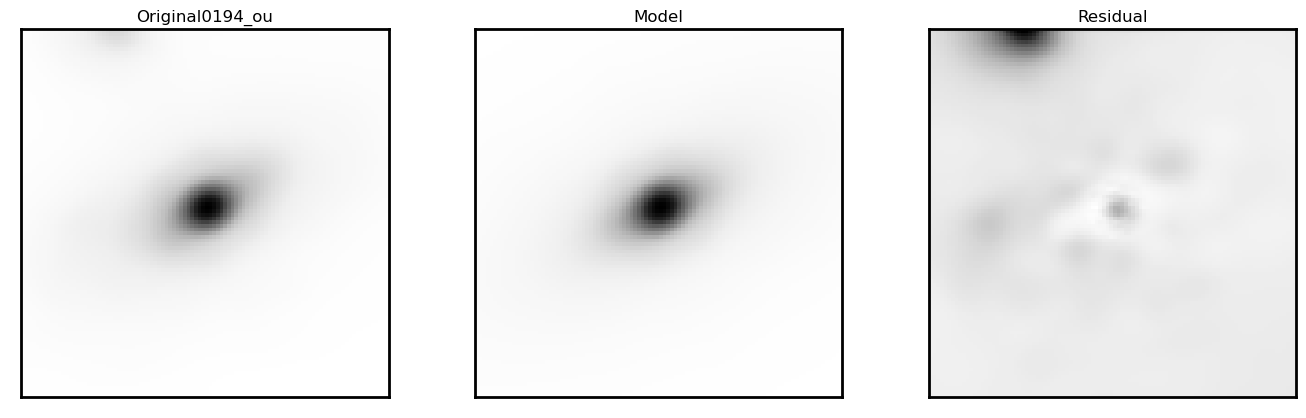

0194_ou


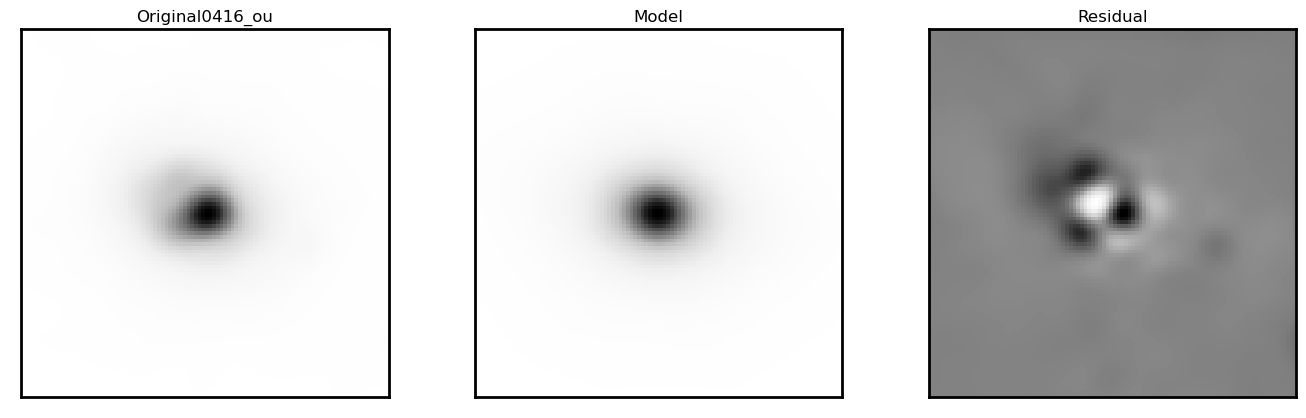

0416_ou


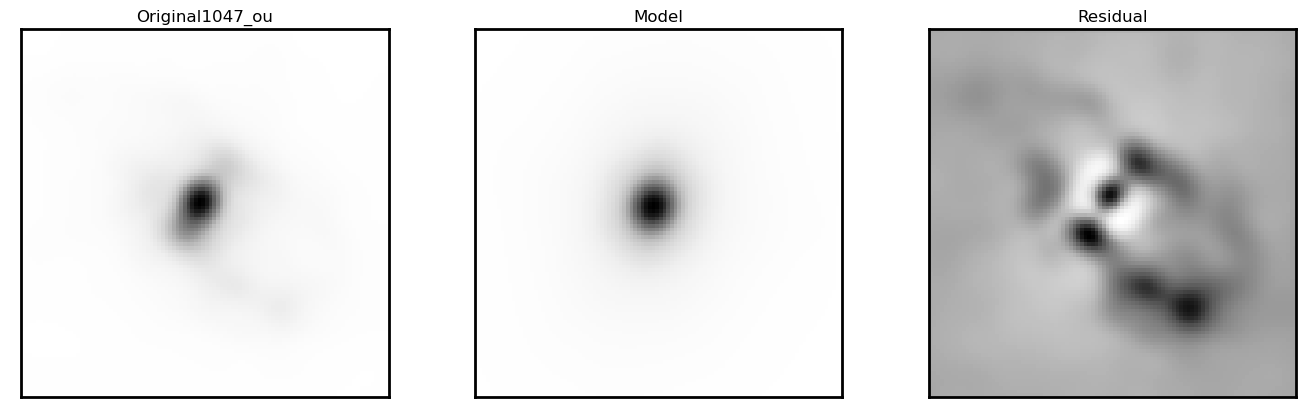

1047_ou


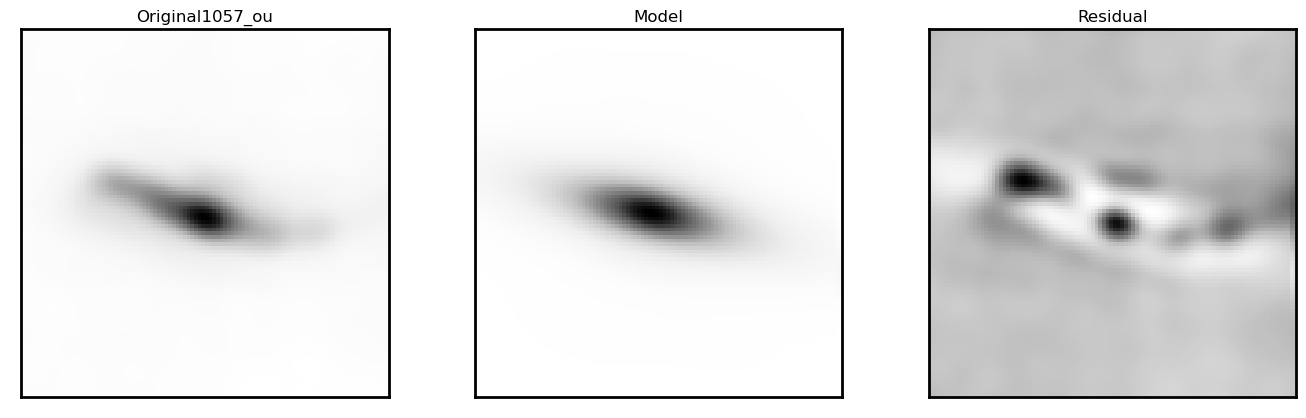

1057_ou


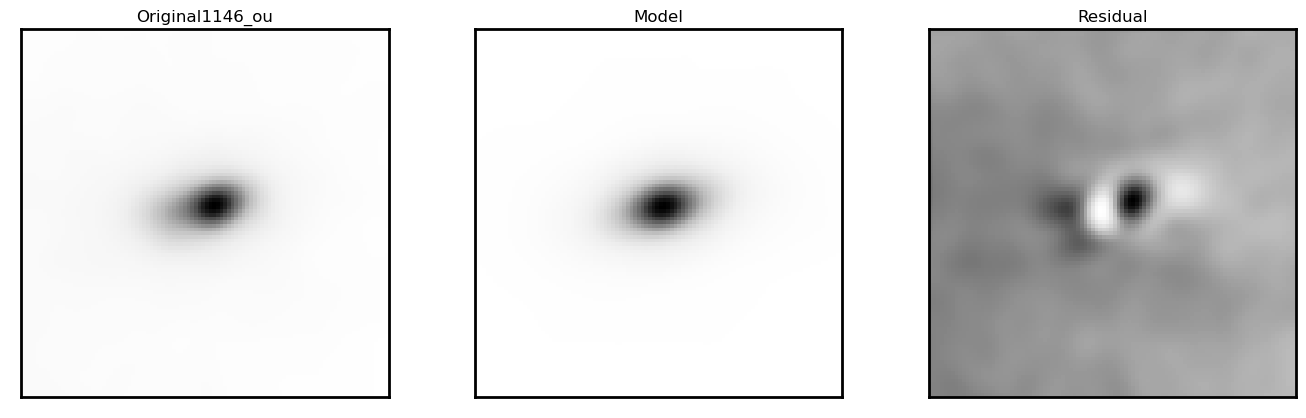

1146_ou


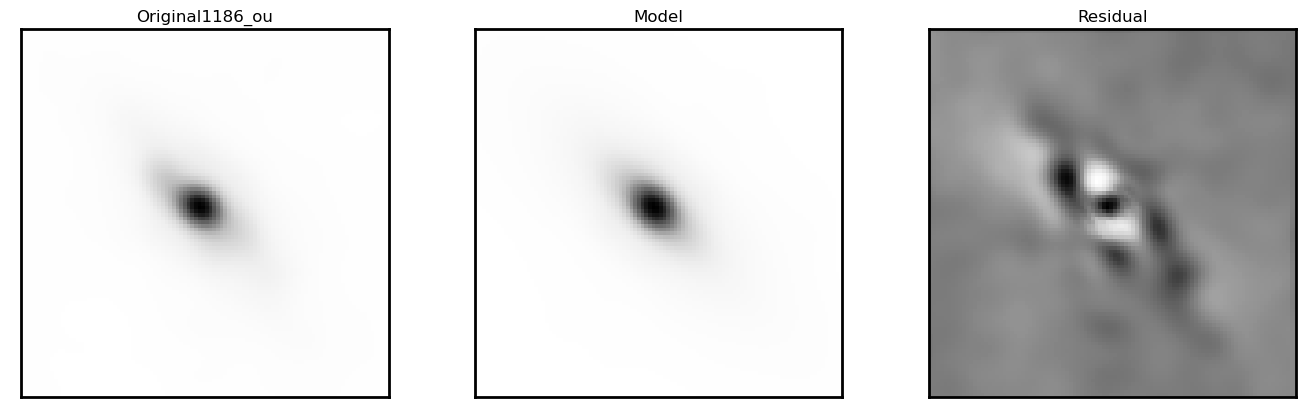

1186_ou


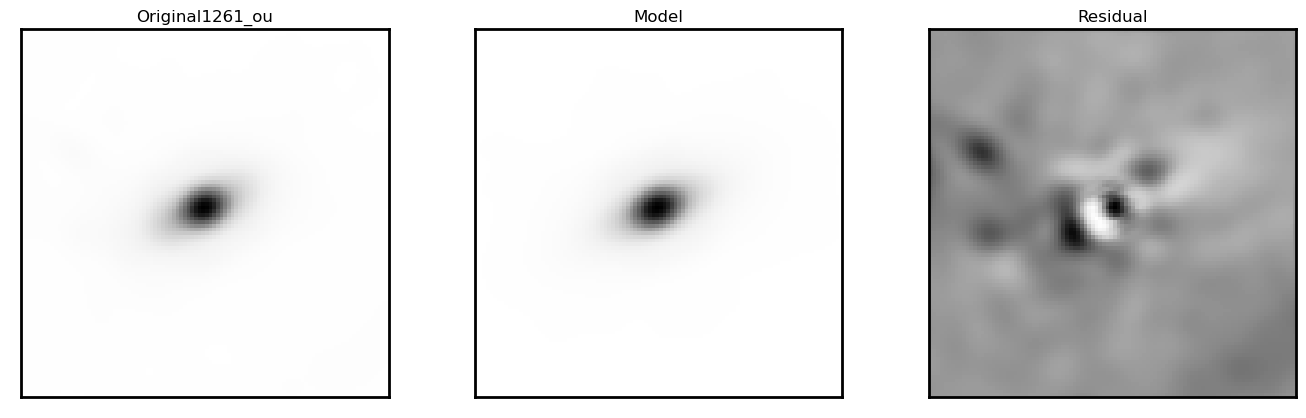

1261_ou


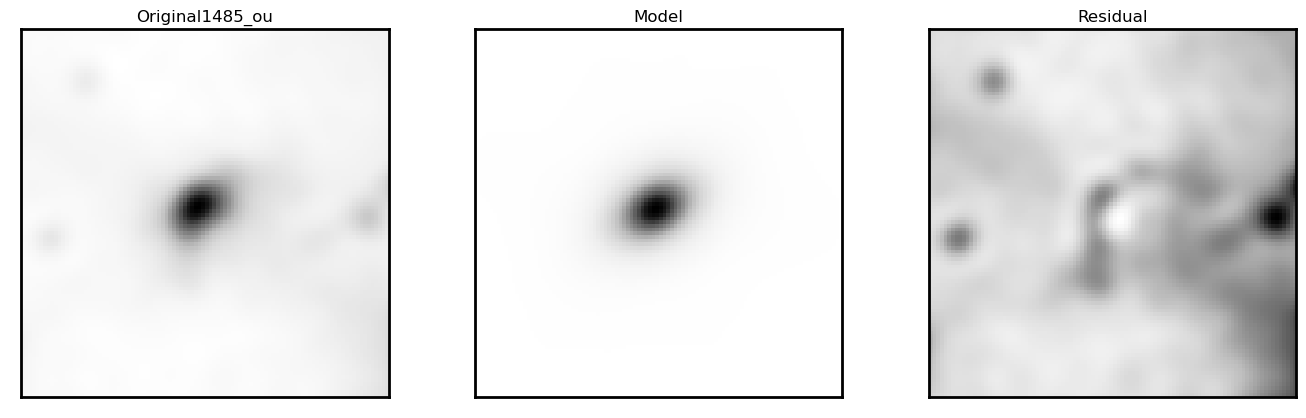

1485_ou


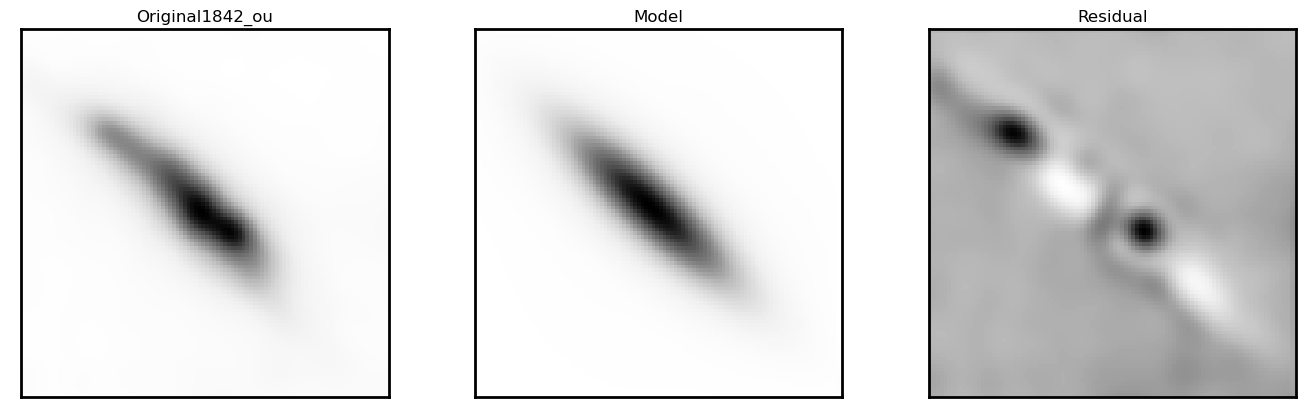

1842_ou


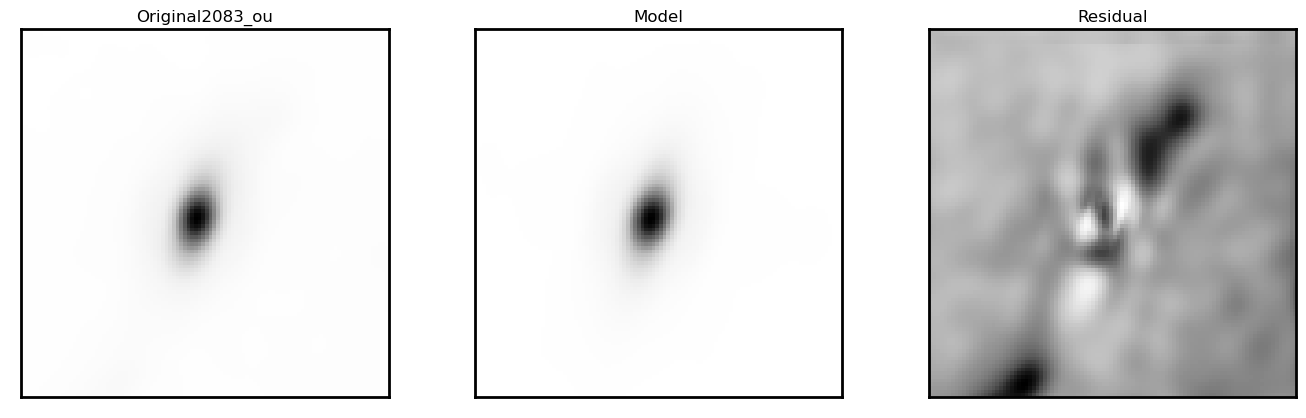

2083_ou


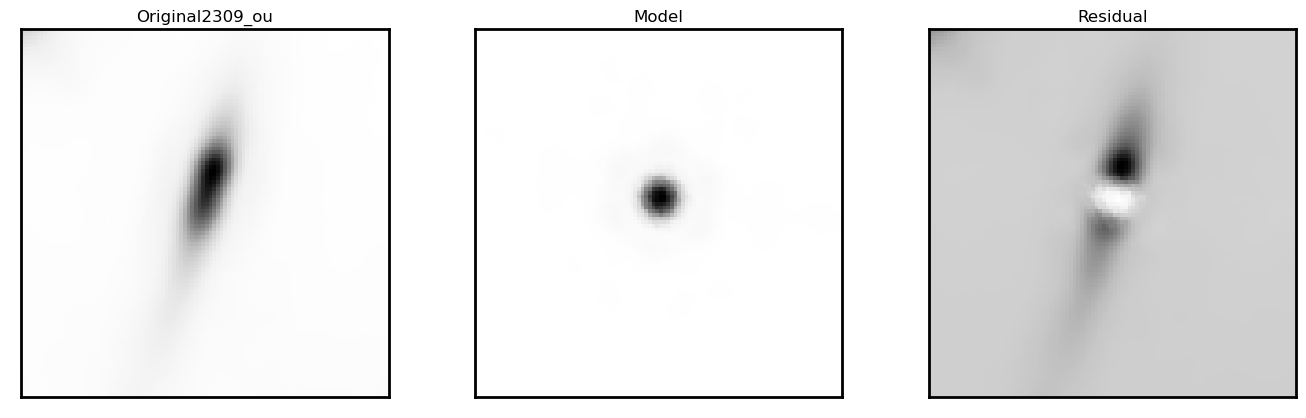

2309_ou


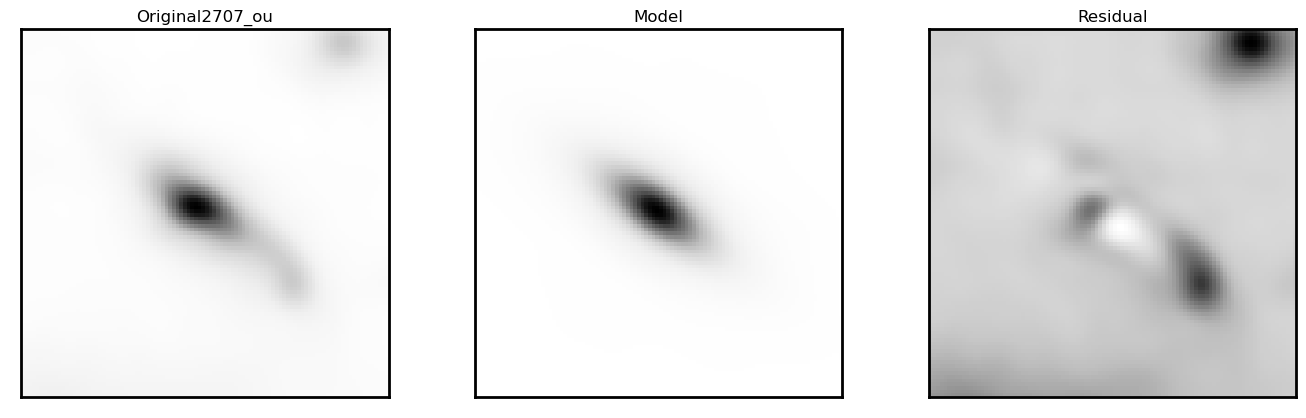

2707_ou


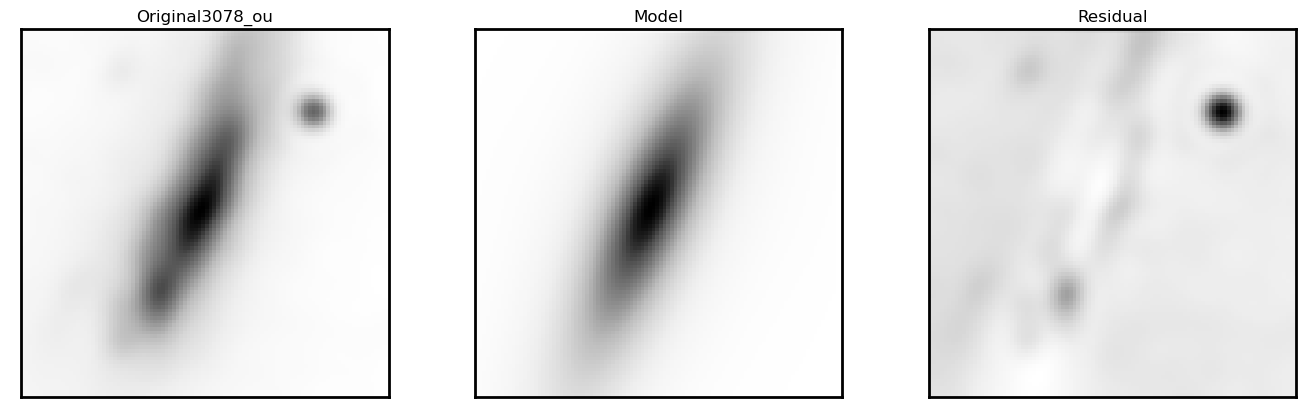

3078_ou


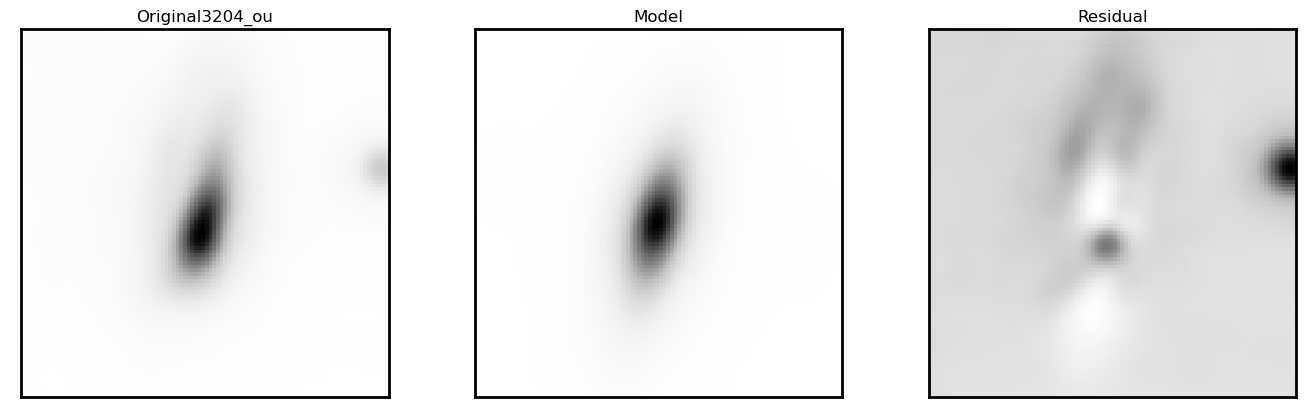

3204_ou


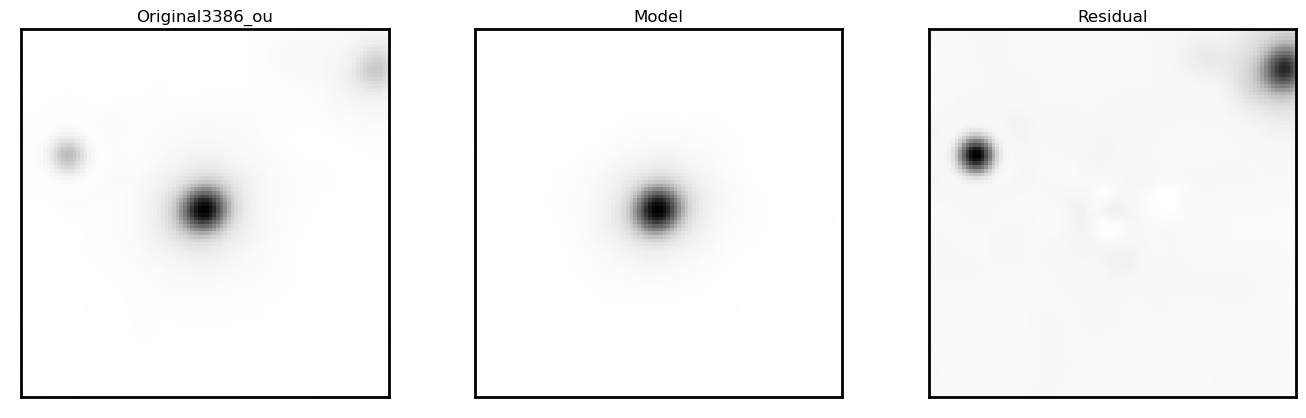

3386_ou


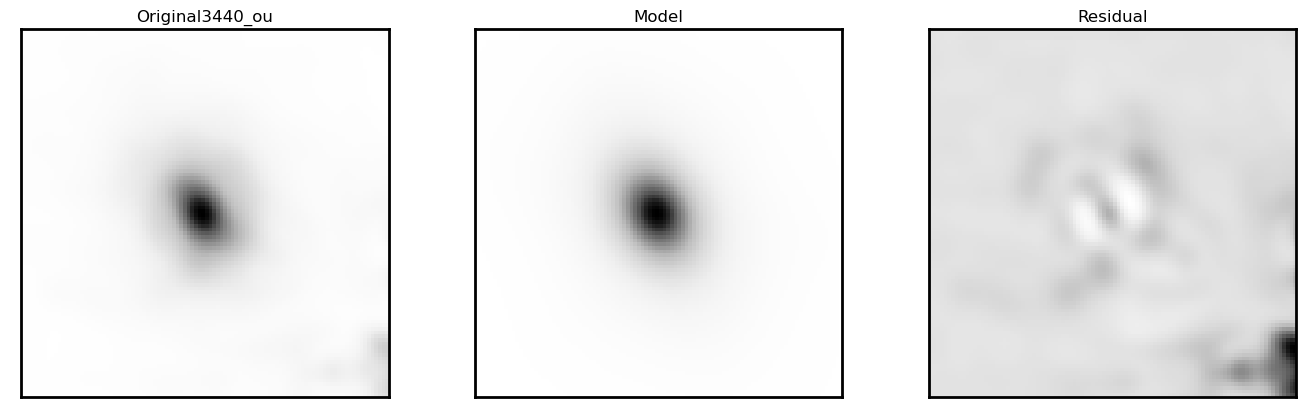

3440_ou


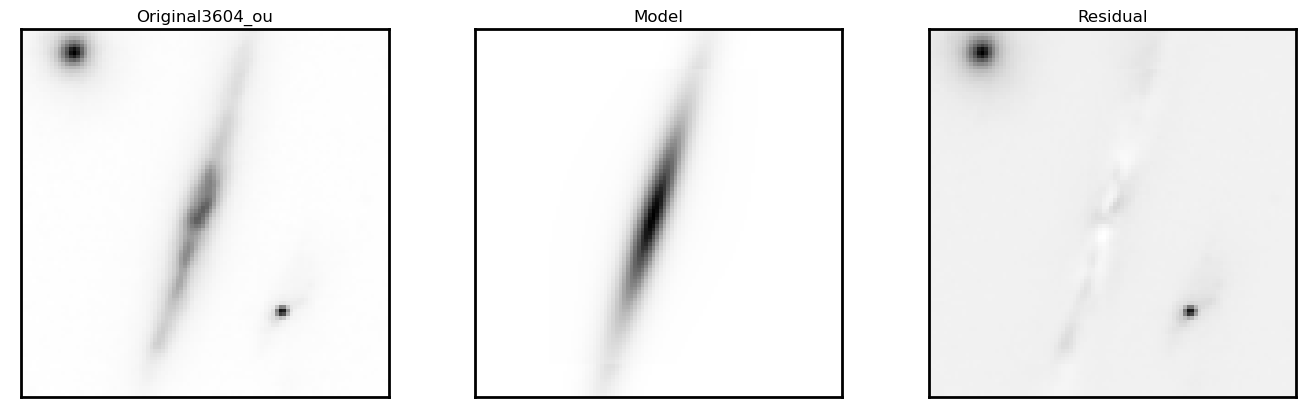

3604_ou


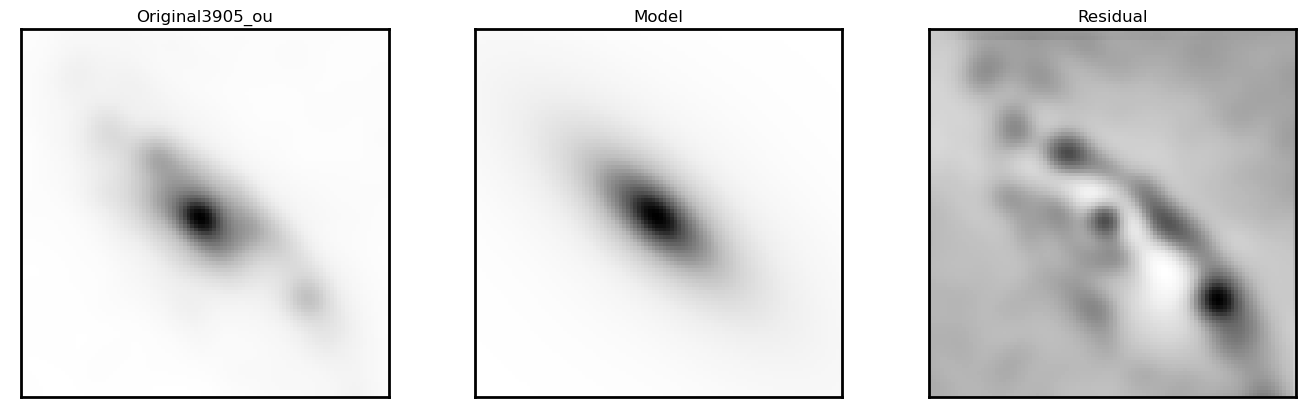

3905_ou


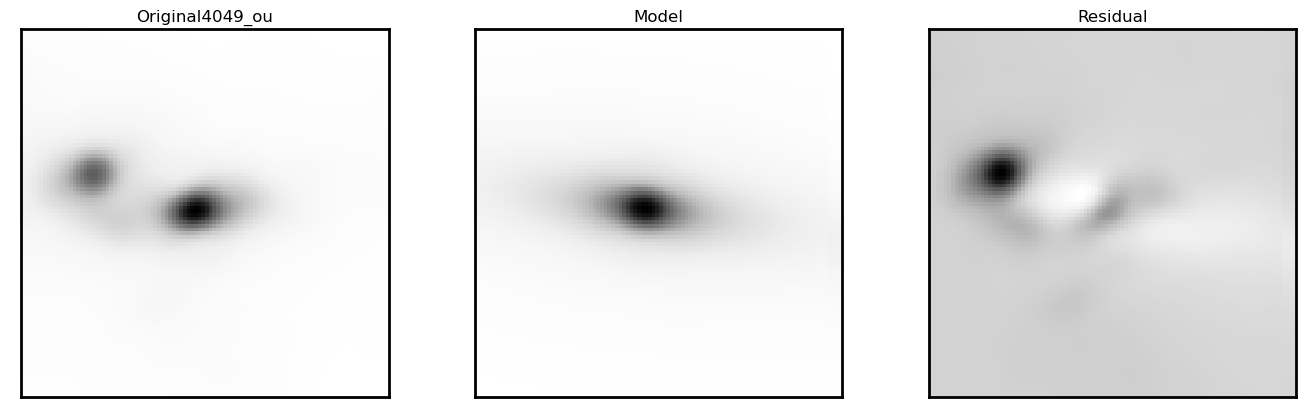

4049_ou


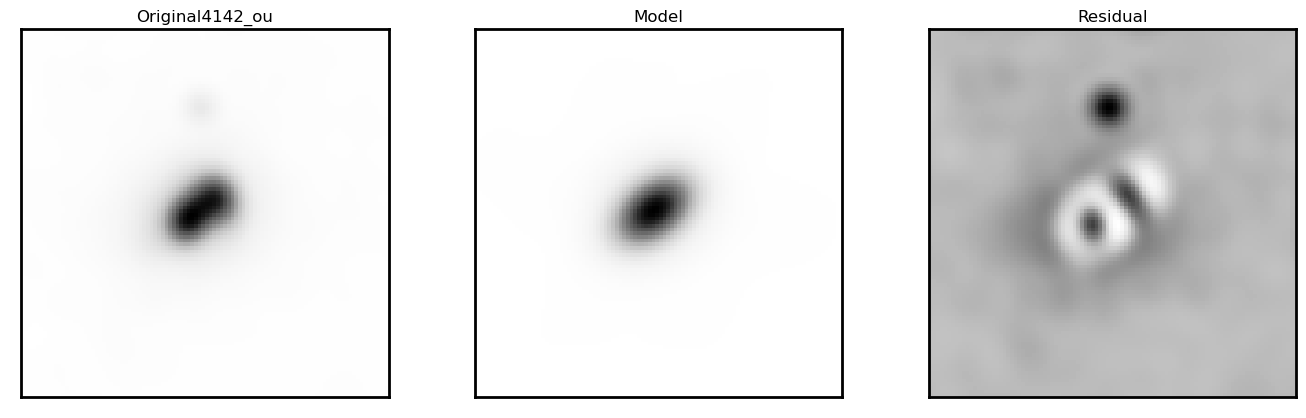

4142_ou


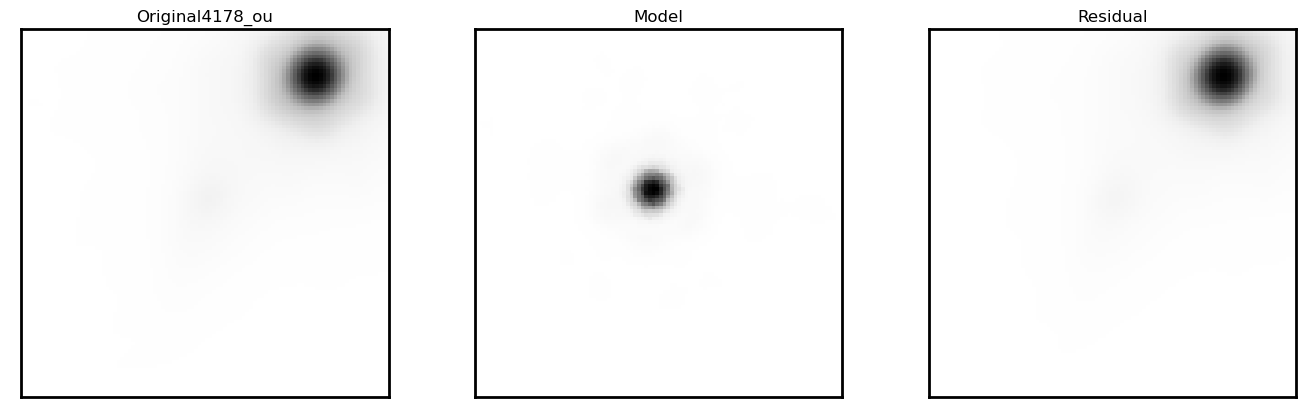

4178_ou


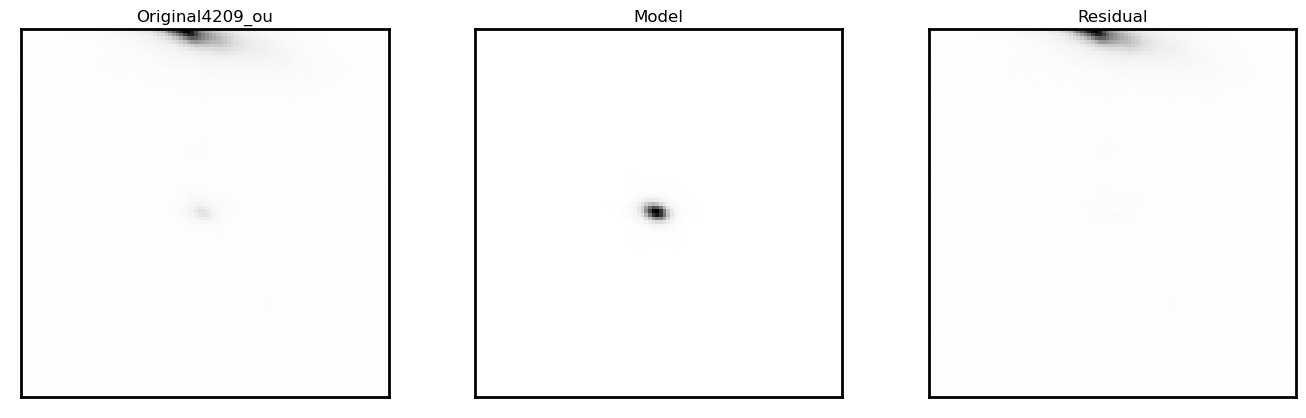

4209_ou


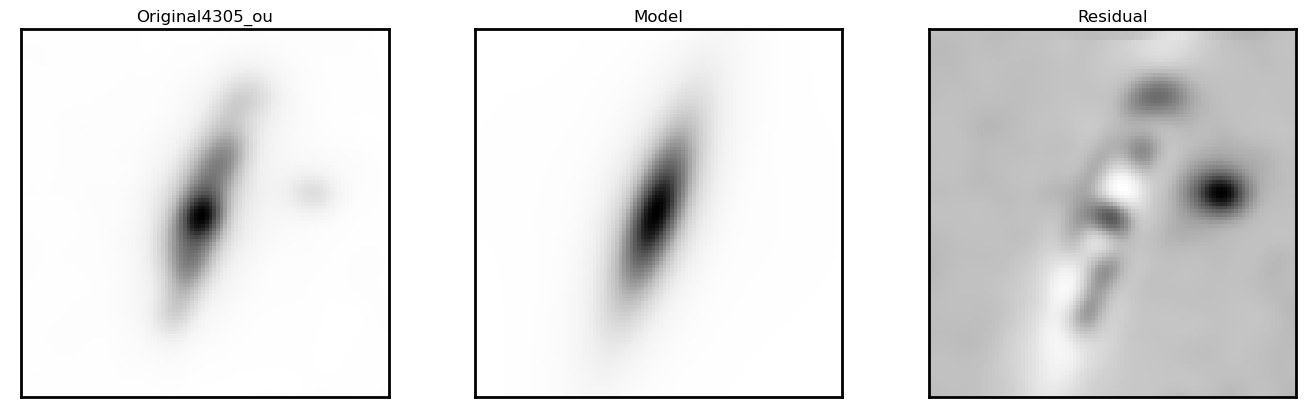

4305_ou


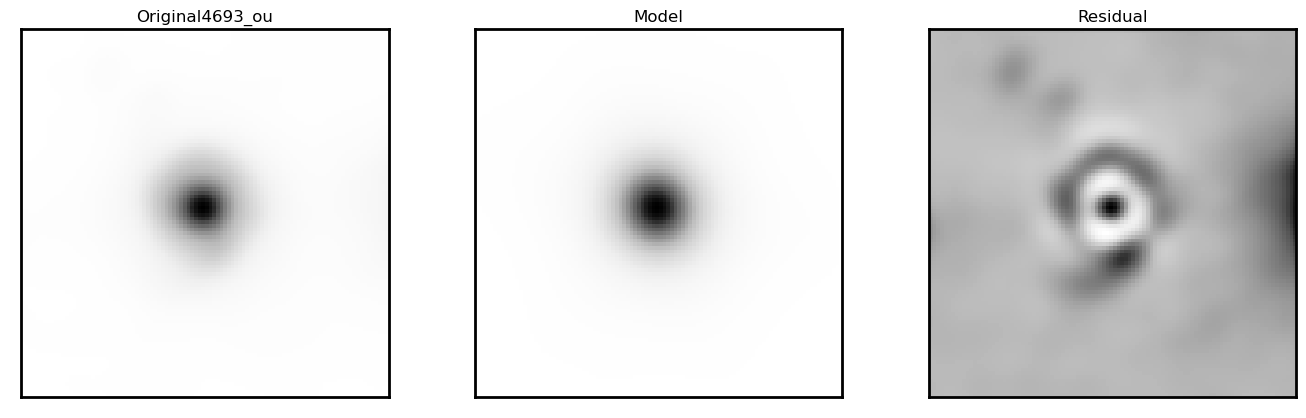

4693_ou


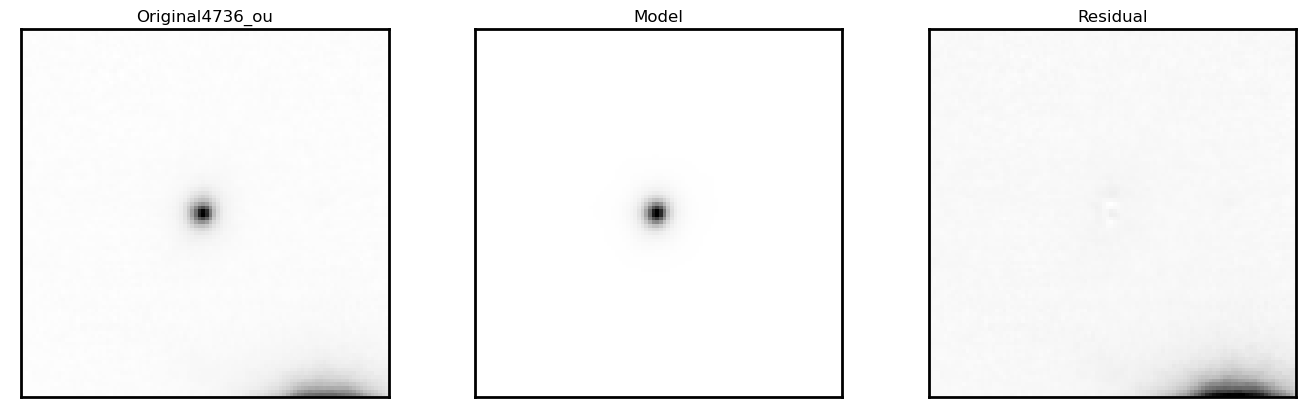

4736_ou


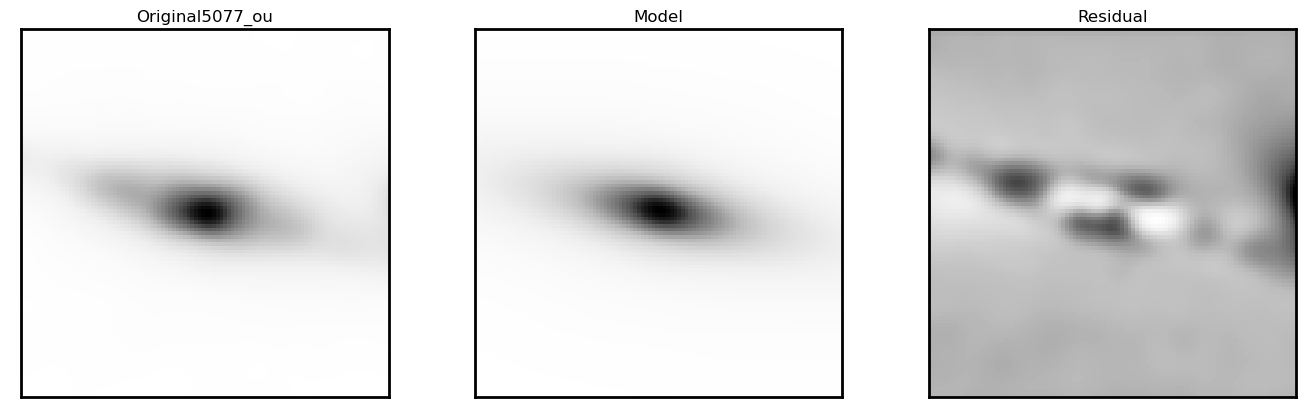

5077_ou


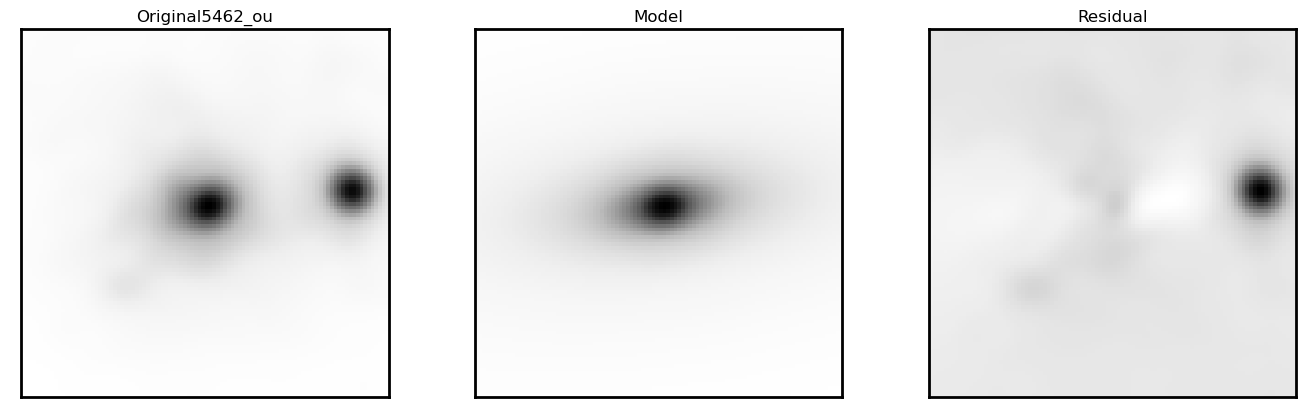

5462_ou


In [69]:
#cur_dir='/Users/liuzhaoran/Desktop/miri/galfit/output/out_image/'
cur_dir='/Users/liuzhaoran/Desktop/miri/galfit/output/out_image_200to770/'
os.chdir(cur_dir)


fits_data=sorted(glob.glob('*.fits'))


for fits_d in fits_data:
    data=fits.open(fits_d)
    dat_name=fits_d[:7]

    img = data[1].data  # Image array
    mod = data[2].data  # Model
    res = data[3].data  # residual
    #Lets see the results
    fig=plt.figure(figsize=(16,14))

    fig=plt.subplots_adjust(hspace=0.1, wspace=0.1,top=0.95, right=0.95)
    ax1=plt.subplot(331)
    #plot_img(ax1,img)
    
    ax1.imshow(np.arcsinh(img), cmap='Greys')

    plt.title(f'Original{dat_name}')
    plt.xticks([],[])
    plt.yticks([],[])

    ax2=plt.subplot(332)
    ax2.imshow(np.arcsinh(mod), cmap='Greys')
    #plot_img(ax2,mod)
    plt.title('Model')
    plt.xticks([],[])
    plt.yticks([],[])

    ax3=plt.subplot(333)
    #plot_img(ax3,res)
    plt.imshow(np.arcsinh(res), cmap='Greys')
    plt.title('Residual')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.show()
    #remove_figure(fig)
    print(dat_name)

In [79]:
data

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1688fa590>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1688f8670>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1688fb310>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1688f85b0>]

In [80]:
from astropy.table import Table

res_table1 = Table(names=('object_id', 'model', 'X_center', 'X_center_err', 'Y_center','Y_center_err',
                         'int_mag','int_mag_err','eff_re','eff_re_err','sersec_index','sersec_index_err',
                         'axis_ratio','axis_ratio_err','pos_angle','pos_angle_err','bad_fit','chi_nu','chi_sq','background'), 
                  dtype=('int64','<U6','<U6','<U6','<U6','<U6','<U6','<U6','<U6','<U6','<U6','<U6','<U6',
                         '<U6','<U6','<U6','?','float64','float64','<U6'))
                                                                                                                    
for outfile in fits_data:
    hdulist = fits.open(outfile)
    galfitheader=hdulist[2].header
    
    id_=[int(galfitheader['INITFILE'][:4])]
    model=[galfitheader['COMP_1']]
    a=b=c=d=e=f=g=0
    
    x=re.search('^[\*]',galfitheader["1_XC"])
    if(x!=None):
        a=1
       # res_table['bad_fit']=True
        x_cen=[re.findall(r"[\*\S]+", galfitheader["1_XC"])[0]]
        x_cen_err=[re.findall(r"[\*\S]+", galfitheader["1_XC"])[2]]
    else:
        x_cen=[re.findall(r"[\S']+", galfitheader["1_XC"])[0]]
        x_cen_err=[re.findall(r"[\S']+", galfitheader["1_XC"])[2]]

    y=re.search('^[\*]',galfitheader["1_YC"])
    if(y!=None):
        b=1
        #res_table['bad_fit']=True
        y_cen=[re.findall(r"[\*\S]+", galfitheader["1_YC"])[0]]
        y_cen_err=[re.findall(r"[\*\S]+", galfitheader["1_YC"])[2]]
    else: 
        y_cen=[re.findall(r"[\S']+", galfitheader["1_YC"])[0]]
        y_cen_err=[re.findall(r"[\S']+", galfitheader["1_YC"])[2]]
        

    mag=re.search('^[\*]',galfitheader["1_MAG"])
    if(mag!=None):
        c=1
        #res_table['bad_fit']=True
        mag=[re.findall(r"[\*\S]+", galfitheader["1_MAG"])[0]]
        mag_err=[re.findall(r"[\*\S]+", galfitheader["1_MAG"])[2]]  
    else:    
        mag=[re.findall(r"[\S']+", galfitheader["1_MAG"])[0]]
        mag_err=[re.findall(r"[\S']+", galfitheader["1_MAG"])[2]]
        

    r_e=re.search('^[\*]',galfitheader["1_RE"])
    if(r_e!=None):
        d=1
        #res_table['bad_fit']=True
        eff_re=[re.findall(r"[\*\S]+", galfitheader["1_RE"])[0]]
        eff_re_err=[re.findall(r"[\*\S]+", galfitheader["1_RE"])[2]]  
    else:    
        eff_re=[re.findall(r"[\S']+", galfitheader["1_RE"])[0]]
        eff_re_err=[re.findall(r"[\S']+", galfitheader["1_RE"])[2]]
        
    s_i=re.search('^[\*]',galfitheader["1_N"])
    if(s_i!=None):
        e=1
        #res_table['bad_fit']=True
        sersec_ind=[re.findall(r"[\*\S]+", galfitheader["1_N"])[0]]
        sersec_ind_err=[re.findall(r"[\*\S]+", galfitheader["1_N"])[2]]    
    else:
        sersec_ind=[re.findall(r"[\S']+", galfitheader["1_N"])[0]]
        sersec_ind_err=[re.findall(r"[\S']+", galfitheader["1_N"][2])]
     
    a_r=re.search('^[\*]',galfitheader["1_AR"])
    if(a_r!=None):
        f=1
        #res_table['bad_fit']=True
        axis_ratio=[re.findall(r"[\*\S]+", galfitheader["1_AR"])[0]]
        axis_ratio_err=[re.findall(r"[\*\S]+", galfitheader["1_AR"])[2]] 
    else:    
        axis_ratio=[re.findall(r"[\S']+", galfitheader["1_AR"])[0]]
        axis_ratio_err=[re.findall(r"[\S']+", galfitheader["1_AR"])[2]]
    
    p_a=re.search('^[\*]',galfitheader["1_PA"])
    if(p_a!=None):
        g=1
        #res_table['bad_fit']=True
        pos_angle=[re.findall(r"[\*\S]+", galfitheader["1_PA"])[0]]
        pos_angle_err=[re.findall(r"[\*\S]+", galfitheader["1_PA"])[2]] 
    else:    
        pos_angle=[re.findall(r"[\S']+", galfitheader["1_PA"])[0]]
        pos_angle_err=[re.findall(r"[\S']+", galfitheader["1_PA"])[2]]
        
    if((a==1) or (b==1) or (c==1) or (d==1) or (e==1) or (f==1) or (g==1)):
        bad_fit=True
    else:
        bad_fit=False
        
    chi_nu=[float(galfitheader["CHI2NU"])]
    chi_sq=[float(galfitheader["CHISQ"])]
    
    background=[re.findall(r"[\S']+", galfitheader["2_SKY"])[0]]
    #[(galfitheader["2_SKY"][0])]
    
    
    
    res_table1.add_row([id_,model,x_cen,x_cen_err,y_cen,y_cen_err,mag,mag_err,eff_re,eff_re_err,sersec_ind,sersec_ind_err,axis_ratio,axis_ratio_err,pos_angle,pos_angle_err,bad_fit,chi_nu,chi_sq,background])
    